In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


/tmp/ipykernel_1930004/3391910190.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
font = {'size'   : 7}
matplotlib.rc('font', **font)
from sklearn.metrics import confusion_matrix
import pandas as pd
import torch

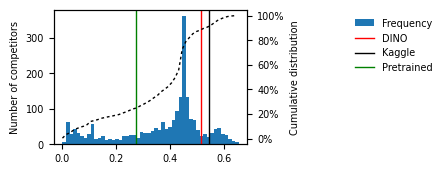

In [3]:
whole_image_leaderboard = pd.read_csv('human-protein-atlas-image-classification-publicleaderboard.csv')

fig, axis = plt.subplots(1,1,figsize=(2.5,1.75))

values = plt.hist(whole_image_leaderboard.Score, bins=50, label='Frequency')
cumulative = np.cumsum(values[0])
cumulative /= cumulative.max()
cumulative *= 100

DINO = 0.51687
DINO_single_cells_for_whole_images = 0.49716
DINO_protein = 0.51474
supervised = 0.42
supervised_pretrained = 0.47
Kaggle =  0.54423
pretrained = 0.27497

lw = 1
plt.axvline(x=DINO, color='red', label='DINO', linewidth=lw)
plt.axvline(x=Kaggle, color='black', label='Kaggle', linewidth=lw)
plt.axvline(x=pretrained, color='green', label='Pretrained', linewidth=lw)
# plt.axvline(x=supervised, color='purple', label='Supervised', linewidth=lw)
ax2 = axis.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.plot(values[1][:-1], cumulative, color='black', dashes=[2], label='Cumulative', linewidth=lw)
plt.xlabel('Performance on test')
axis.set_ylabel('Number of competitors')
ax2.set_ylabel('Cumulative distribution')
axis.legend(frameon=False, bbox_to_anchor=[2,1])


In [ ]:
np.argmin((whole_image_leaderboard.Score.values[::-1] - DINO) ** 2) / len(whole_image_leaderboard.Score)
np.argmin((whole_image_leaderboard.Score.values[::-1] - Kaggle) ** 2) / len(whole_image_leaderboard.Score)


Text(0, 0.5, 'Cumulative distribution')

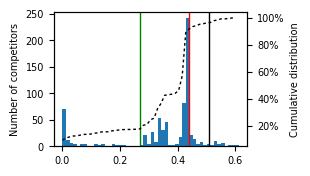

In [18]:
whole_image_leaderboard = pd.read_csv('hpa-single-cell-image-classification-publicleaderboard.csv')

fig, axis = plt.subplots(1,1,figsize=(2.5,1.75))

values = plt.hist(whole_image_leaderboard.Score, bins=50, label='Frequency')
cumulative = np.cumsum(values[0])
cumulative /= cumulative.max()
cumulative *= 100

DINO = 0.44
Kaggle =  0.51
pretrained = 0.27
lw = 1

plt.axvline(x=DINO, color='red', label='DINO', linewidth=lw)
plt.axvline(x=Kaggle, color='black', label='Kaggle', linewidth=lw)
plt.axvline(x=pretrained, color='green', label='Pretrained', linewidth=lw)
ax2 = axis.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.plot(values[1][:-1], cumulative, color='black', dashes=[2], label='Cumulative', linewidth=lw)
# axis.legend(frameon=False)
plt.xlabel('Performance on test')
axis.set_ylabel('Number of competitors')
ax2.set_ylabel('Cumulative distribution')


Text(0, 0.5, 'Single cell')

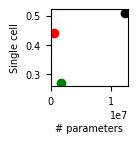

In [6]:
DINO_params = 529939
Kaggle_params =  12233593
pretrained_params = 1709587
DINO = 0.44
Kaggle =  0.51
pretrained = 0.27
fig, axis = plt.subplots(1,1,figsize=(1,1))

plt.scatter(DINO_params, DINO, color='red')
plt.scatter(Kaggle_params, Kaggle, color='black')
plt.scatter(pretrained_params, pretrained, color='green')
plt.xlabel('\n# parameters', fontsize=7)
plt.ylabel('Single cell', fontsize=7)

(200000.0, 220000000.0, 0.0, 0.7)

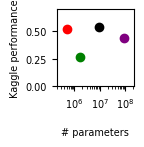

In [7]:
DINO_params = 529939
Kaggle_params =  9157346
pretrained_params = 1709587
supervised_params = 86389276
supervised = 0.43535
DINO = 0.52
Kaggle =  0.54
pretrained = 0.27
fig, axis = plt.subplots(1,1,figsize=(1,1))

plt.scatter(DINO_params, DINO, color='red')
plt.scatter(Kaggle_params, Kaggle, color='black')
plt.scatter(supervised_params, supervised, color='purple')
plt.scatter(pretrained_params, pretrained, color='green')
plt.xlabel('\n# parameters', fontsize=7)
plt.ylabel('Kaggle performance', fontsize=7)
axis.set_xscale('log')
plt.axis([200000, 220000000, 0, 0.7])

In [8]:
cells_DINO =  0.93
cells_Bestfitting = 0.6920088266191581
cells_Pretrained = 0.9834303297769443
cells_Supervised = 0.6170011099464577

([], [])

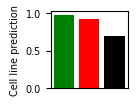

In [10]:
fig, axis = plt.subplots(1,1,figsize=(1,1))

plt.bar(x=[0], height=[cells_Pretrained], color='green')
plt.bar(x=[1], height=[cells_DINO], color='red')
plt.bar(x=[2], height=[cells_Bestfitting], color='black')
plt.ylabel('Cell line prediction', fontsize=7)
plt.xticks([])

In [67]:
DINO_train = 0.823
DINO_pretrained = 0.89
XGBoost = 0.819


(-0.5, 2.5, 0.0, 1.0)

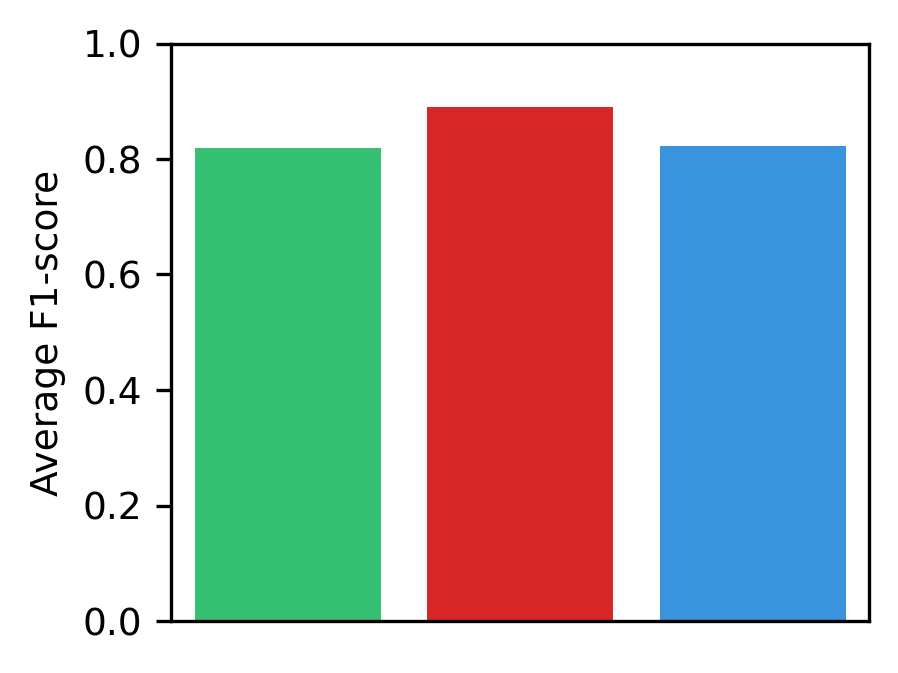

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
font = {'size'   : 9}
matplotlib.rc('font', **font)
from sklearn.metrics import confusion_matrix
import pandas as pd
import torch
fig, axis = plt.subplots(1,1,figsize=(3,2.5), dpi=300)

plt.bar(x=[0], height=[XGBoost], color='#35c073')
plt.bar(x=[1], height=[DINO_pretrained], color='#d72827')
plt.bar(x=[2], height=[DINO_train], color='#3993dd')
plt.ylabel('Average F1-score')
plt.xticks([])
plt.axis([-0.5, 2.5, 0, 1])

In [57]:
all_targets
# predictions

tensor([[ 18.9257, -25.0567, -40.3575, -43.9519, -35.1699, -29.6857],
        [ 14.6930, -23.5335, -46.5294, -45.8038, -40.6146, -26.0527],
        [ 12.0681, -17.8102, -54.7180, -65.4109, -51.4990, -32.3860],
        ...,
        [ 19.2774, -28.3594, -44.1761, -41.3913, -32.3458, -27.4489],
        [ 33.9572, -56.0372, -89.0741, -80.2034, -71.3110, -48.7339],
        [ 26.4829, -39.8636, -77.4128, -69.3496, -60.0252, -45.2150]])

In [29]:

phases = [
    'Interphase', 
    'prophase', 
    'early prometaphase', 
    'prometaphase/metaphase', 
    'anaphase/telophase paired',
    'anaphase/telophase unpaired', 
]


In [63]:
torch.sigmoid(predictions)

tensor([[1.0000e+00, 1.3123e-11, 2.9713e-18, 8.1648e-20, 5.3202e-16, 1.2814e-13],
        [1.0000e+00, 6.0190e-11, 6.2019e-21, 1.2813e-20, 2.2977e-18, 4.8469e-12],
        [9.9999e-01, 1.8414e-08, 1.7229e-24, 3.9121e-29, 4.3080e-23, 8.6085e-15],
        ...,
        [1.0000e+00, 4.8267e-13, 6.5248e-20, 1.0568e-18, 8.9622e-15, 1.1997e-12],
        [1.0000e+00, 4.6061e-25, 0.0000e+00, 1.4727e-35, 1.0716e-31, 6.8409e-22],
        [1.0000e+00, 4.8694e-18, 2.3992e-34, 7.6182e-31, 8.5388e-27, 2.3088e-20]])

In [66]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
all_targets, predictions, = torch.load('Allen_trained_model.pth')

xgbscores = f1_score(np.argmax(all_targets, axis=1), np.argmax(predictions, axis=1), average=None)
print(xgbscores)
print(np.mean(xgbscores))


[0.99409731 0.72707182 0.65945946 0.9200627  0.75955056 0.84634146]
0.817763885296385


[]

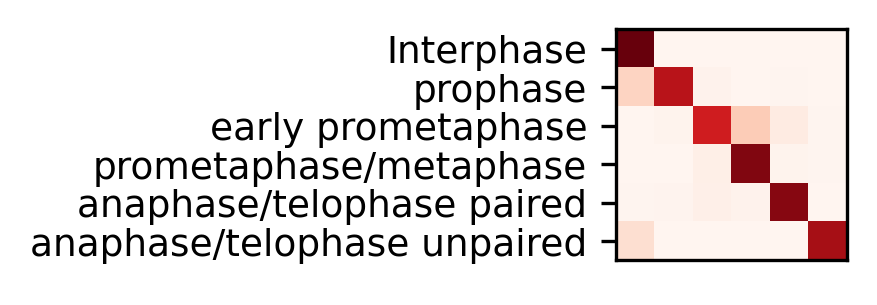

In [60]:
all_targets, predictions, = torch.load('Allen_pretrained_model.pth')
mat = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(all_targets, axis=1), normalize='true')
fig, axes = plt.subplots(1,1,figsize=(1,1), dpi=300)
axes.imshow(mat, cmap='Reds')
axes.set_yticks([])
axes.set_yticks(range(6))
axes.set_yticklabels(phases)
axes.set_xticks([])
